# Градиентный бустинг



В этом задании будет использоваться датасет `boston` из `sklearn.datasets`. 

Последние 25% объектов для контроля качества

Будем реализовывать простой вариант градиентного бустинга над регрессионными деревьями для случая квадратичной функции потерь.

In [1]:
from sklearn import ensemble, cross_validation, metrics, tree

import numpy as np

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Генерация и изучение данных

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print'data:', boston.data.shape,'\n', 'target:', boston.target.shape

data: (506L, 13L) 
target: (506L,)


In [4]:
print boston

{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), 'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7'), 'DESCR': "Boston House Prices dataset\n=======

In [5]:
print boston.data.shape

(506L, 13L)


In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [7]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Сплит данных для целей анализа

In [8]:
X_train, X_test = boston.data[:380], boston.data[380:]
y_train, y_test = boston.target[:380], boston.target[380:]

## часть 1

формула для функции потерь

**L'z(Yi - An-1(xi)) = 2*(An-1(xi) - Yi)** --> **(An-1(xi) - Yi)**

## часть 2

In [9]:
# функция, которая собирает базовые алгоритмы в композицию и делает на этой композиции предсказание
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [10]:
# задаем число базовых алгоритмов - деревьев
N = 50

# задаем массивы для базовых алгоритмов и коэффициентов
base_algorithms_list = []
coefficients_list = []

for i in range(N):
        # формируем объект дерево для очередного базового алгоритма
    DT_Regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
        # формируем массив соэффициентов
    coefficients_list.append(0.9)
        # вычисляем вектор сдвига
    s = - (gbm_predict(X_train) - y_train)
        # обучаем очередной базовый алгоритм на этом векторе сдвига
    algorithm = DT_Regressor.fit(X_train, s)
        # ну и добавляем обученный алгоритм в список базовых алгоритмов
    base_algorithms_list.append(algorithm)

In [11]:
RMSE = metrics.mean_squared_error(gbm_predict(X_test), y_test) ** 0.5

In [12]:
RMSE

5.4554720745275347

## часть 3

уменьшаем шаг по формуле `0.9 / (1.0 + i)`, где `i` - номер итерации (от 0 до 49). Контролируем качество работы алгоритма по RMSE

In [13]:
# задаем число базовых алгоритмов - деревьев
N = 50

# задаем массивы для базовых алгоритмов и коэффициентов
base_algorithms_list = []
coefficients_list = []

for i in range(N):
        # формируем объект дерево для очередного базового алгоритма
    DT_Regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
        # формируем массив соэффициентов
    coefficients_list.append(0.9 / (1.0 + i))
        # вычисляем вектор сдвига
    s = - (gbm_predict(X_train) - y_train)
        # обучаем очередной базовый алгоритм на этом векторе сдвига
    algorithm = DT_Regressor.fit(X_train, s)
        # ну и добавляем обученный алгоритм в список базовых алгоритмов
    base_algorithms_list.append(algorithm)

In [14]:
RMSE = metrics.mean_squared_error(gbm_predict(X_test), y_test) ** 0.5
RMSE

5.2407425841471982

## часть 4

Исследуем стандартный градиентный бустинг `GradientBoostingRegressor` из `sklearn`. 

### Зависимость качества Градиентного бустинга от числа итераций (базовых алгоритмов-деревьев)

#### а) через cross_val_score

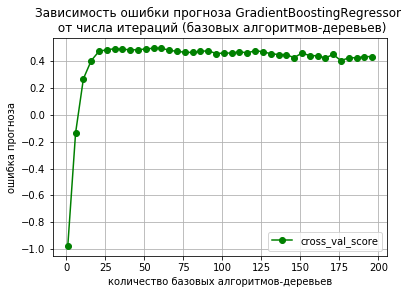

In [15]:
pylab.grid(True)
X = range(1, 200, 5)
pylab.plot(X, 
            [cross_validation.cross_val_score(ensemble.GradientBoostingRegressor(n_estimators=N), 
           boston.data, boston.target, cv=10).mean() for N in X], 'g-', marker='o', label='cross_val_score')
pylab.legend(loc='best')
pylab.title(u'Зависимость ошибки прогноза GradientBoostingRegressor \n от числа итераций (базовых алгоритмов-деревьев)')
pylab.xlabel(u'количество базовых алгоритмов-деревьев')
pylab.ylabel(u'ошибка прогноза')

#### б) через RMSE на тестовой выборке

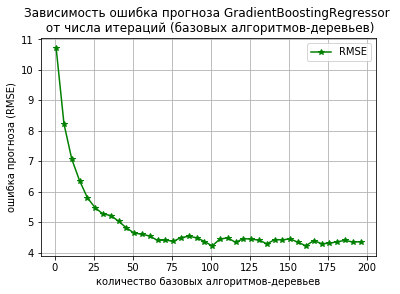

In [16]:
pylab.grid(True)
X = range(1, 200, 5)
pylab.plot(X, 
           [metrics.mean_squared_error(ensemble.GradientBoostingRegressor(n_estimators=N).fit(X_train, y_train).predict(X_test), 
            y_test) ** 0.5 for N in X], 'g-', marker='*', label='RMSE')
pylab.legend(loc='best')
pylab.title(u'Зависимость ошибка прогноза GradientBoostingRegressor \n от числа итераций (базовых алгоритмов-деревьев)')
pylab.xlabel(u'количество базовых алгоритмов-деревьев')
pylab.ylabel(u'ошибка прогноза (RMSE)')

### Зависимость качества Градиентного бустинга с ростом глубины деревьев

а) через cross_val_score

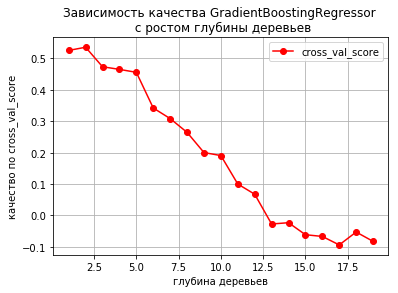

In [17]:
pylab.grid(True)
X =  range(1, 20)
pylab.plot(X, 
           [cross_validation.cross_val_score(ensemble.GradientBoostingRegressor(max_depth=N), 
           boston.data, boston.target, cv=10).mean() for N in X] , 'r-', marker='o', label='cross_val_score')
pylab.legend(loc='best')
pylab.title(u'Зависимость качества GradientBoostingRegressor \n с ростом глубины деревьев')
pylab.xlabel(u'глубина деревьев')
pylab.ylabel(u'качество по cross_val_score')

#### б) через RMSE на тестовой выборке

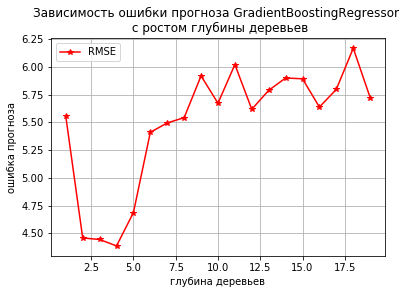

In [18]:
pylab.grid(True)
X = range(1, 20)
pylab.plot(X, 
          [metrics.mean_squared_error(ensemble.GradientBoostingRegressor(max_depth=N).fit(X_train, y_train).predict(X_test), 
            y_test) ** 0.5 for N in X], 'r-', marker='*', label='RMSE')
pylab.legend(loc='best')
pylab.title(u'Зависимость ошибки прогноза GradientBoostingRegressor \n с ростом глубины деревьев')
pylab.xlabel(u'глубина деревьев')
pylab.ylabel(u'ошибка прогноза')

## часть 5

Сравним градиентный бустинг (качество) с качеством работы линейной регрессии `LinearRegression` из `sklearn.linear_model` (с параметрами по умолчанию) на обучающей выборке. Оценим для прогнозов полученного алгоритма на тестовой выборке `RMSE`.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_regression = LinearRegression()

In [21]:
lin_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
RMSE = metrics.mean_squared_error(lin_regression.predict(X_test), y_test)  ** 0.5

In [24]:
RMSE

7.8481217964800516